In [1]:
from estimador import *
from functions import *
from filtros import *
from fit_voc import *
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

### Obtenemos el Ground Truth de SOH y ciclos de las celdas

In [2]:
# Obtenemos el ground truth
gt_path = "C:/Users/Bruno/OneDrive - Universidad de Chile/BGMG/CASE/Datasets/Dataset_aging/cells_SOH_25deg.csv"
gt_soh_values = pd.read_csv(gt_path)
# Obtenemos los ciclos de cada celda
path = "C:/Users/Bruno/OneDrive - Universidad de Chile/BGMG/CASE/Datasets/Dataset_aging/cells_cycles_25deg.csv"
cycle_values = pd.read_csv(path)
gt_soh_values

,D30_0,E30_0,F30_0,C85_70,D85_70,D100_85,E100_85,F100_85,D100_0_drive,E100_0_drive,D100_0_,E100_0_
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.956672,0.945440,0.953341,0.978380,0.978223,0.985113,0.987026,0.984339,0.957386,0.952200,0.958063,0.957267
2,0.888100,0.880463,0.888987,0.969021,0.970280,0.965058,0.964104,0.964840,0.934058,0.935481,0.933245,0.934681
3,0.857320,0.851063,0.853256,0.960418,0.962952,0.946165,0.944715,0.946973,0.920934,0.922607,0.908312,0.910992
4,0.841922,0.835265,0.833843,0.953576,0.955763,0.927879,0.927477,0.930778,0.911324,0.912829,0.889487,0.895003
5,0.832690,0.825146,0.824182,0.947506,0.950879,0.913063,0.908689,0.917540,0.902280,0.903161,0.883462,0.886562
6,0.824490,0.814722,0.810584,0.941144,0.942437,0.884896,0.876411,0.896086,0.892396,0.893675,0.876218,0.878436
7,0.818153,0.801828,0.797390,0.937413,0.934023,0.887786,0.888055,0.898636,0.883509,0.884577,0.868952,0.871723
8,0.812961,0.796190,0.791492,0.930387,0.925096,0.857548,0.845812,0.885889,0.875958,0.876944,0.862589,0.865615
9,0.803136,0.781448,0.765043,0.928263,0.919983,0.854349,0.839055,0.881913,0.864434,0.866416,0.855277,0.858361


## Aplicamos el modelo de degradación a cada celda
### Definimos los modelos a utilizar

In [3]:
param_ds = dict(
    vL=1.35531394,
    v0=4.12017677,
    gamma=0.13286143,
    alpha=0.16945463,
    beta=2.34538224,
    Qmax=4.850,
    # Qmax=df.SoH.max(),
    Bias_Rint=0.01454392,
    Factor_Rint=0.1879029,
    # life_cycles=938,
    # life_cycles=1170,
    life_cycles=300,
    adapt_cell=True,
    degradation_percentage=0.8
)
param_st = dict(
    vL=1.35531394,
    v0=4.12017677,
    gamma=0.13286143,
    alpha=0.16945463,
    beta=2.34538224,
    Qmax=4.850,
    # Qmax=df.SoH.max(),
    Bias_Rint=0.01454392,
    Factor_Rint=0.1879029,
    life_cycles=938,
    # life_cycles=1170,
    # life_cycles=300,
    adapt_cell=True,
    degradation_percentage=0.8
)
param_ag = dict(
    vL=1.35531394,
    v0=4.12017677,
    gamma=0.13286143,
    alpha=0.16945463,
    beta=2.34538224,
    Qmax=4.850,
    # Qmax=df.SoH.max(),
    Bias_Rint=0.01454392,
    Factor_Rint=0.1879029,
    # life_cycles=938,
    life_cycles=1170,
    # life_cycles=300,
    adapt_cell=True,
    degradation_percentage=0.8
)

f_aramis_ds = FiltrosAnidados()
f_aramis_ds.Q_inst = param_ds.get("Qmax")
f_aramis_ds.fit_batt_model(param_ds)
f_aramis_ds.modelo_th.fit_inverse()
f_aramis_ds.voc_thresh = 0.05
f_aramis_ds.voc_times = 47
f_aramis_ds.sigma_autonomia = 0.04
f_aramis_ds.sigma_capacidad = 0.001 * 5
f_aramis_ds.estim_kwargs = {"sigma_e": 0.00075}

f_aramis_st = FiltrosAnidados()
f_aramis_st.Q_inst = param_st.get("Qmax")
f_aramis_st.fit_batt_model(param_st)
f_aramis_st.modelo_th.fit_inverse()
f_aramis_st.voc_thresh = 0.05
f_aramis_st.voc_times = 47
f_aramis_st.sigma_autonomia = 0.04
f_aramis_st.sigma_capacidad = 0.001 * 5
f_aramis_st.estim_kwargs = {"sigma_e": 0.00075}

f_aramis_ag = FiltrosAnidados()
f_aramis_ag.Q_inst = param_ag.get("Qmax")
f_aramis_ag.fit_batt_model(param_ag)
f_aramis_ag.modelo_th.fit_inverse()
f_aramis_ag.voc_thresh = 0.05
f_aramis_ag.voc_times = 47
f_aramis_ag.sigma_autonomia = 0.04
f_aramis_ag.sigma_capacidad = 0.001 * 5
f_aramis_ag.estim_kwargs = {"sigma_e": 0.00075}

f_adap_ds = FiltrosAnidados()
f_adap_ds.Q_inst = param_ds.get("Qmax")
f_adap_ds.fit_batt_model(param_ds)
f_adap_ds.modelo_th.fit_inverse()
f_adap_ds.voc_thresh = 0.05
f_adap_ds.voc_times = 47
f_adap_ds.sigma_autonomia = 0.04
f_adap_ds.sigma_capacidad = 0.001 * 5
f_adap_ds.estim_kwargs = {"sigma_e": 0.00075}

f_adap_st = FiltrosAnidados()
f_adap_st.Q_inst = param_st.get("Qmax")
f_adap_st.fit_batt_model(param_st)
f_adap_st.modelo_th.fit_inverse()
f_adap_st.voc_thresh = 0.05
f_adap_st.voc_times = 47
f_adap_st.sigma_autonomia = 0.04
f_adap_st.sigma_capacidad = 0.001 * 5
f_adap_st.estim_kwargs = {"sigma_e": 0.00075}

f_adap_ag = FiltrosAnidados()
f_adap_ag.Q_inst = param_ag.get("Qmax")
f_adap_ag.fit_batt_model(param_ag)
f_adap_ag.modelo_th.fit_inverse()
f_adap_ag.voc_thresh = 0.05
f_adap_ag.voc_times = 47
f_adap_ag.sigma_autonomia = 0.04
f_adap_ag.sigma_capacidad = 0.001 * 5
f_adap_ag.estim_kwargs = {"sigma_e": 0.00075}

f_lin_ds = FiltrosAnidados()
f_lin_ds.Q_inst = param_ds.get("Qmax")
f_lin_ds.fit_batt_model(param_ds)
f_lin_ds.modelo_th.fit_inverse()
f_lin_ds.voc_thresh = 0.05
f_lin_ds.voc_times = 47
f_lin_ds.sigma_autonomia = 0.04
f_lin_ds.sigma_capacidad = 0.001 * 5
f_lin_ds.estim_kwargs = {"sigma_e": 0.00075}

f_lin_st = FiltrosAnidados()
f_lin_st.Q_inst = param_st.get("Qmax")
f_lin_st.fit_batt_model(param_st)
f_lin_st.modelo_th.fit_inverse()
f_lin_st.voc_thresh = 0.05
f_lin_st.voc_times = 47
f_lin_st.sigma_autonomia = 0.04
f_lin_st.sigma_capacidad = 0.001 * 5
f_lin_st.estim_kwargs = {"sigma_e": 0.00075}

f_lin_ag = FiltrosAnidados()
f_lin_ag.Q_inst = param_ag.get("Qmax")
f_lin_ag.fit_batt_model(param_ag)
f_lin_ag.modelo_th.fit_inverse()
f_lin_ag.voc_thresh = 0.05
f_lin_ag.voc_times = 47
f_lin_ag.sigma_autonomia = 0.04
f_lin_ag.sigma_capacidad = 0.001 * 5
f_lin_ag.estim_kwargs = {"sigma_e": 0.00075}

if f_adap_ds.modelo_th.parameters["adapt_cell"]:
    f_adap_ds.modelo_th.adapt_degradation()
    f_adap_ds.modelo_th.setup_knn()
    print("celda: f_adap_ds adaptada")
if f_adap_st.modelo_th.parameters["adapt_cell"]:
    f_adap_st.modelo_th.adapt_degradation()
    f_adap_st.modelo_th.setup_knn()
    print("celda: f_adap_st adaptada")
if f_adap_ag.modelo_th.parameters["adapt_cell"]:
    f_adap_ag.modelo_th.adapt_degradation()
    f_adap_ag.modelo_th.setup_knn()
    print("celda: f_adap_ag adaptada")

if f_lin_ds.modelo_th.parameters["adapt_cell"]:
    f_lin_ds.modelo_th.linear_degradation()
    f_lin_ds.modelo_th.adapt_degradation()
    f_lin_ds.modelo_th.setup_knn()
    print("celda: f_lin_ds adaptada y linealizada")
if f_lin_st.modelo_th.parameters["adapt_cell"]:
    f_lin_st.modelo_th.linear_degradation()
    f_lin_st.modelo_th.adapt_degradation()
    f_lin_st.modelo_th.setup_knn()
    print("celda: f_lin_st adaptada y linealizada")
if f_lin_ag.modelo_th.parameters["adapt_cell"]:
    f_lin_ag.modelo_th.linear_degradation()
    f_lin_ag.modelo_th.adapt_degradation()
    f_lin_ag.modelo_th.setup_knn()
    print("celda: f_lin_ag adaptada y linealizada")

modelo de celda seteado. Tabla de degradación:  {'100-0': [1.0], '100-25': [1.00000266], '75-0': [1.0000186], '100-50': [0.99999203], '75-25': [1.00001521], '50-0': [1.00002874], '100-75': [1.00002146], '75-50': [1.00000881], '62.5-37.5': [1.0000062], '50-25': [1.00003347], '25-0': [1.00004184]}
Parámetros del modelo:
{'A_Rint': 0.3084,
 'B_Rint': -0.2578,
 'Bias_Rint': 0.01454392,
 'C_Rint': -0.05083,
 'D_Rint': 0.1317,
 'Factor_R_SOH0': 0.28371948548,
 'Factor_R_SOH1': -0.57276721458,
 'Factor_R_SOH2': 0.32037195027000004,
 'Factor_R_SOH3': 0.02140399288,
 'Factor_Rint': 0.1879029,
 'Qmax': 4.85,
 'adapt_cell': True,
 'alpha': 0.16945463,
 'beta': 2.34538224,
 'degradation_data': {'100-0': [1.0],
                      '100-25': [1.00000266],
                      '100-50': [0.99999203],
                      '100-75': [1.00002146],
                      '25-0': [1.00004184],
                      '50-0': [1.00002874],
                      '50-25': [1.00003347],
                     

### Ejecutamos el modelo de degradación para cada celda

In [4]:
models = [f_aramis_ds,f_aramis_st,f_aramis_ag,f_adap_ds,f_adap_st,f_adap_ag,f_lin_ds,f_lin_st,f_lin_ag]
models_str = ["f_aramis_ds","f_aramis_st","f_aramis_ag","f_adap_ds","f_adap_st","f_adap_ag","f_lin_ds","f_lin_st","f_lin_ag"]
cells = ["D30_0","D85_70","D100_85","D100_0_drive","D100_0_"]
SR = [[30,0],[85,70],[100,85],[100,0],[100,0]]

cells_ = []
models_ = []
SR_ = []

for model in models:
    model.Q_inst = param_ds.get("Qmax")

cells_SOH_list = [] #lista de listas de SOH de cada modelo por cada celda
models_SOH_list = [] #lista con SOH de cada modelo para cada celda

max_len = 0
Q_healthy = param_ds.get("Qmax")
cell_eq_cycle = pd.DataFrame()
max_values = pd.DataFrame()

for i,cell in enumerate(cells):
    SOH_values = []
    eq_cycle_cnt = 0
    soc_inst = SR[i][0]
    soc_counting_eqcycle = [soc_inst]
    soc_acc = 0

    soc_profile = generate_soc_profile(SR[i][0],SR[i][1],cycle_values[cell].values[0])
    differences = [soc_profile[i] - soc_profile[i-1] for i in range(1, len(soc_profile))]

    for j,model in enumerate(models):
        for dsoc in differences:
            soc_inst += dsoc
            soc_counting_eqcycle.append(soc_inst)
            if dsoc < 0:
                soc_acc+=dsoc
            if soc_acc < -100:
                eta_k_eqcycle = model.get_factor(soc_counting_eqcycle,unnml=False)
                model.Q_inst *= eta_k_eqcycle[0]

                soc_acc = 0
                soc_counting_eqcycle = [soc_counting_eqcycle[-1]]
                eq_cycle_cnt += 1
            SOH_values.append(model.Q_inst / Q_healthy)
        
        max_len = len(SOH_values) #obtenemos la cantidad max de muestras por SR de cada celda
        max_values[cell] = [max_len] #se guarda para cada celda
        cell_eq_cycle[cell] = [eq_cycle_cnt]
        eq_cycle_cnt = 0

        models_SOH_list.append(SOH_values) #se guarda la degradación de cada celda
        SOH_values = []
        model.Q_inst = param_ds.get("Qmax")

    cells_SOH_list.append(models_SOH_list)
    models_SOH_list = []
    



eta normal:  [0.99929442]  aplicado
eta normal:  [0.99929476]  aplicado
eta normal:  [0.99929482]  aplicado
eta normal:  [0.99929452]  aplicado
eta normal:  [0.99929485]  aplicado
eta normal:  [0.9992947]  aplicado
eta normal:  [0.99929462]  aplicado
eta normal:  [0.99929492]  aplicado
eta normal:  [0.99929456]  aplicado
eta normal:  [0.99929471]  aplicado
eta normal:  [0.9992949]  aplicado
eta normal:  [0.99929445]  aplicado
eta normal:  [0.99929479]  aplicado
eta normal:  [0.99929478]  aplicado
eta normal:  [0.99929455]  aplicado
eta normal:  [0.99929487]  aplicado
eta normal:  [0.99929465]  aplicado
eta normal:  [0.99929465]  aplicado
eta normal:  [0.99929494]  aplicado
eta normal:  [0.99929451]  aplicado
eta normal:  [0.99929474]  aplicado
eta normal:  [0.99929486]  aplicado
eta normal:  [0.99929449]  aplicado
eta normal:  [0.99929482]  aplicado
eta normal:  [0.99929474]  aplicado
eta normal:  [0.99929458]  aplicado
eta normal:  [0.99929489]  aplicado
eta normal:  [0.99929461]  apl

In [5]:
cell_eq_cycle

,D30_0,D85_70,D100_85,D100_0_drive,D100_0_
0,998,920,844,686,1158


### Obtenemos el df con los SOH calculados y rellenamos con nan

In [6]:
cells_SOH = pd.DataFrame()
lengths = []
for i,cell in enumerate(cells):
    lengths.append(max(len(list) for list in cells_SOH_list[i]))
max_length = max(lengths)

# Function to pad the list with NaN to match the maximum length
def pad_list(lst, length):
    return lst + [np.nan] * (length - len(lst))

for i,cell in enumerate(cells):
    for j,model in enumerate(models_str):
        str_ = str(cell)+str(model)
        cells_SOH[str_] = pad_list(cells_SOH_list[i][j], max_length)

### Adaptamos los indices del GT

In [7]:
indexes = []
indexes_df = pd.DataFrame()
for i,cell in enumerate(cells):
    count = gt_soh_values[cell].count()
    index_list = np.linspace(0, max_values[cell][0], count)
    indexes_ = [np.round(idx,0) for idx in index_list.tolist()]
    indexes.append(indexes_)

max_length = 16
for i,cell in enumerate(cells):
    indexes[i] = pad_list(indexes[i], max_length)
    indexes_df[cell] = indexes[i]
    
indexes_df

,D30_0,D85_70,D100_85,D100_0_drive,D100_0_
0,0.0,0.0,0.0,0.0,0.0
1,8015.0,8265.0,8257.0,7777.0,7878.0
2,16029.0,16530.0,16515.0,15554.0,15756.0
3,24044.0,24796.0,24772.0,23331.0,23634.0
4,32058.0,33061.0,33029.0,31108.0,31512.0
5,40073.0,41326.0,41287.0,38884.0,39390.0
6,48088.0,49592.0,49544.0,46661.0,47268.0
7,56102.0,57857.0,57802.0,54438.0,55146.0
8,64117.0,66122.0,66059.0,62215.0,63023.0
9,72132.0,74387.0,74316.0,69992.0,70901.0


### Graficamos los valores

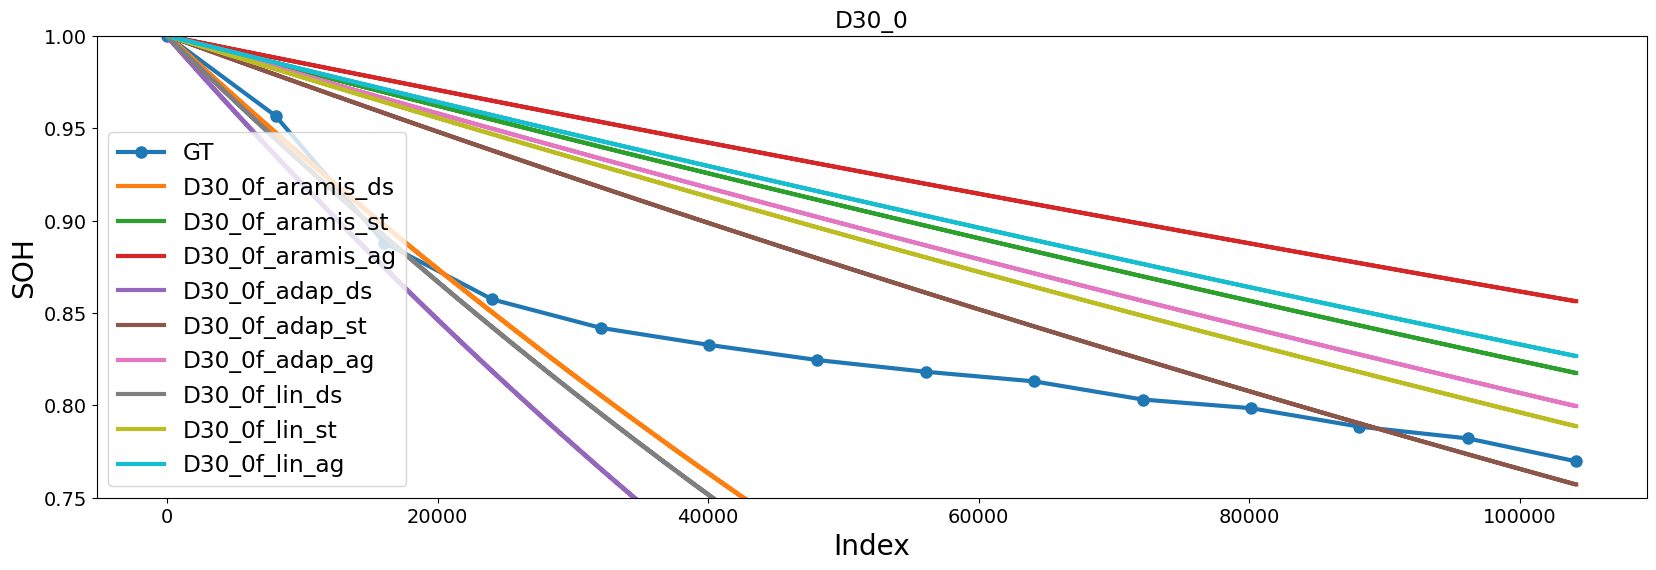

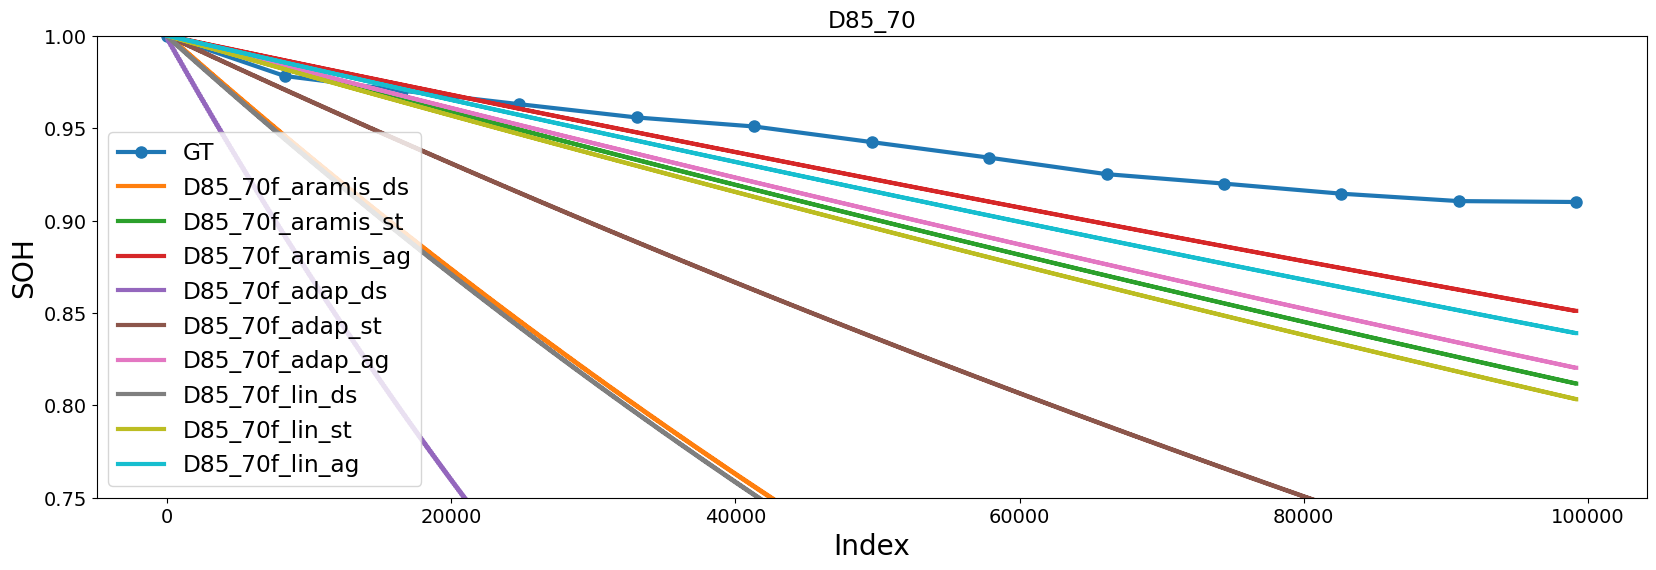

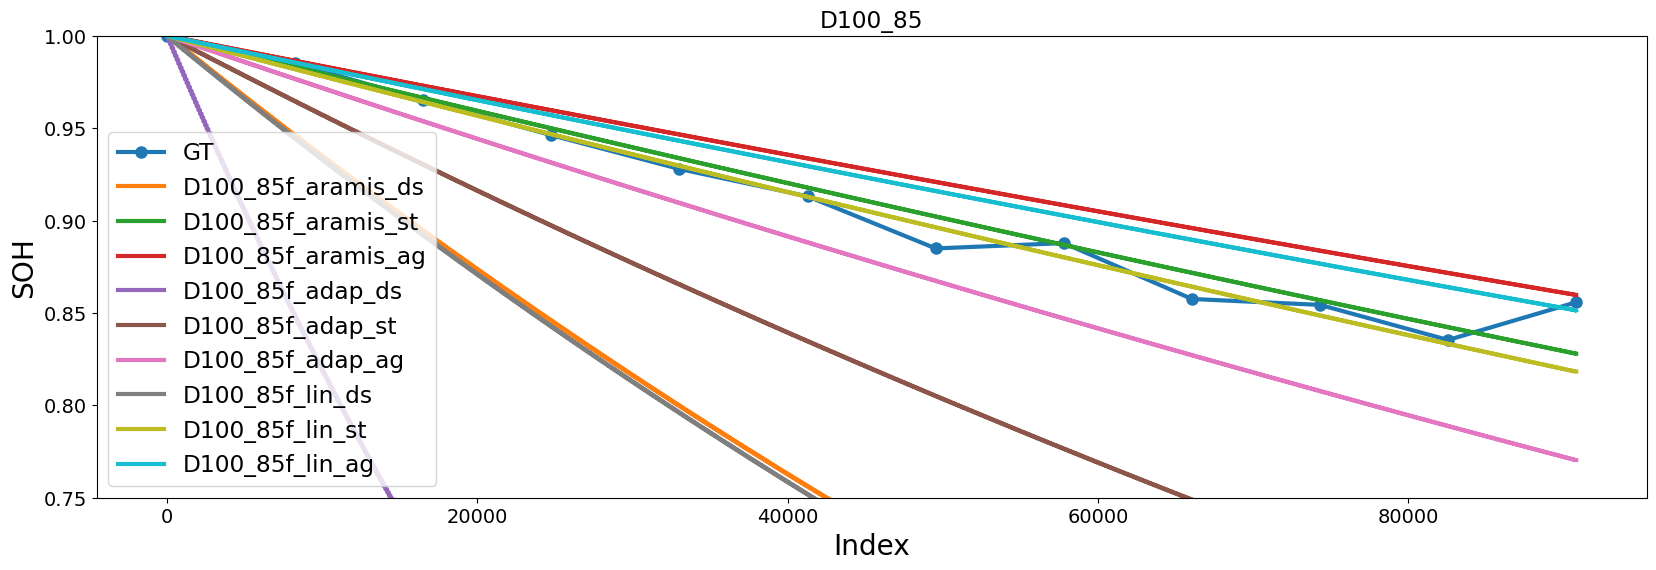

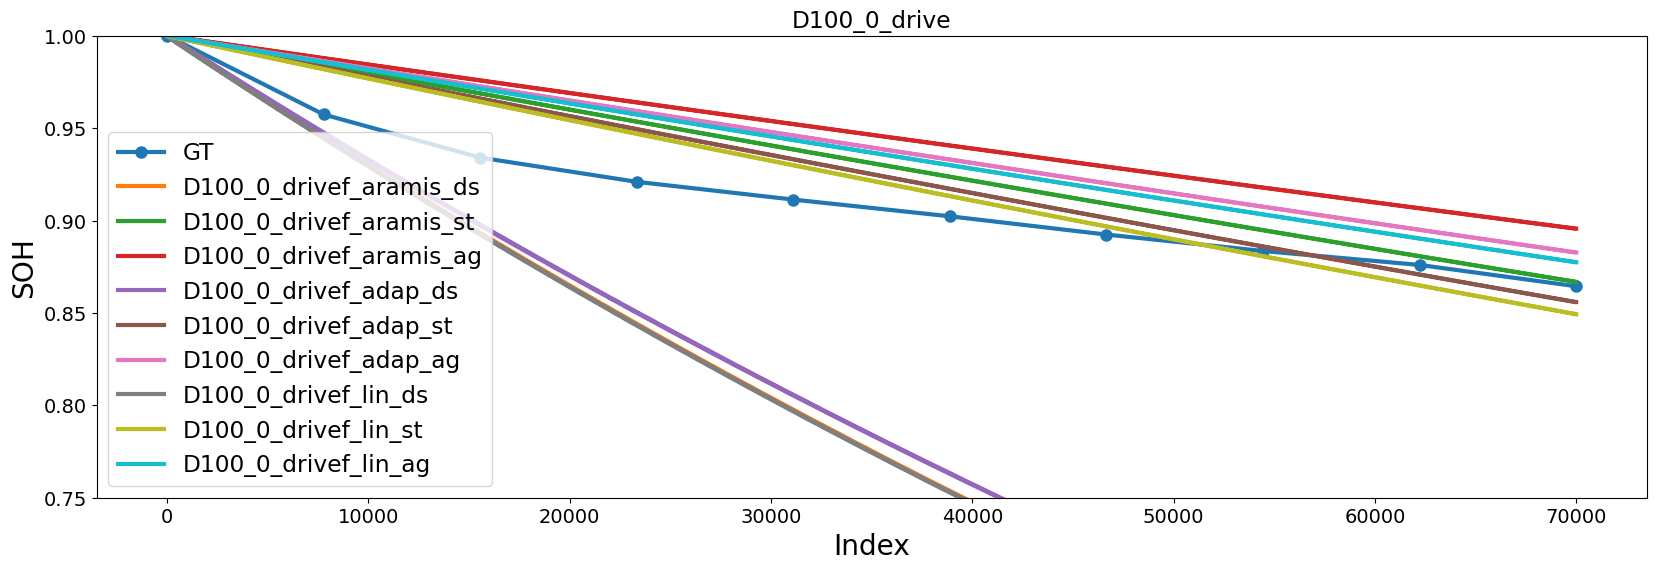

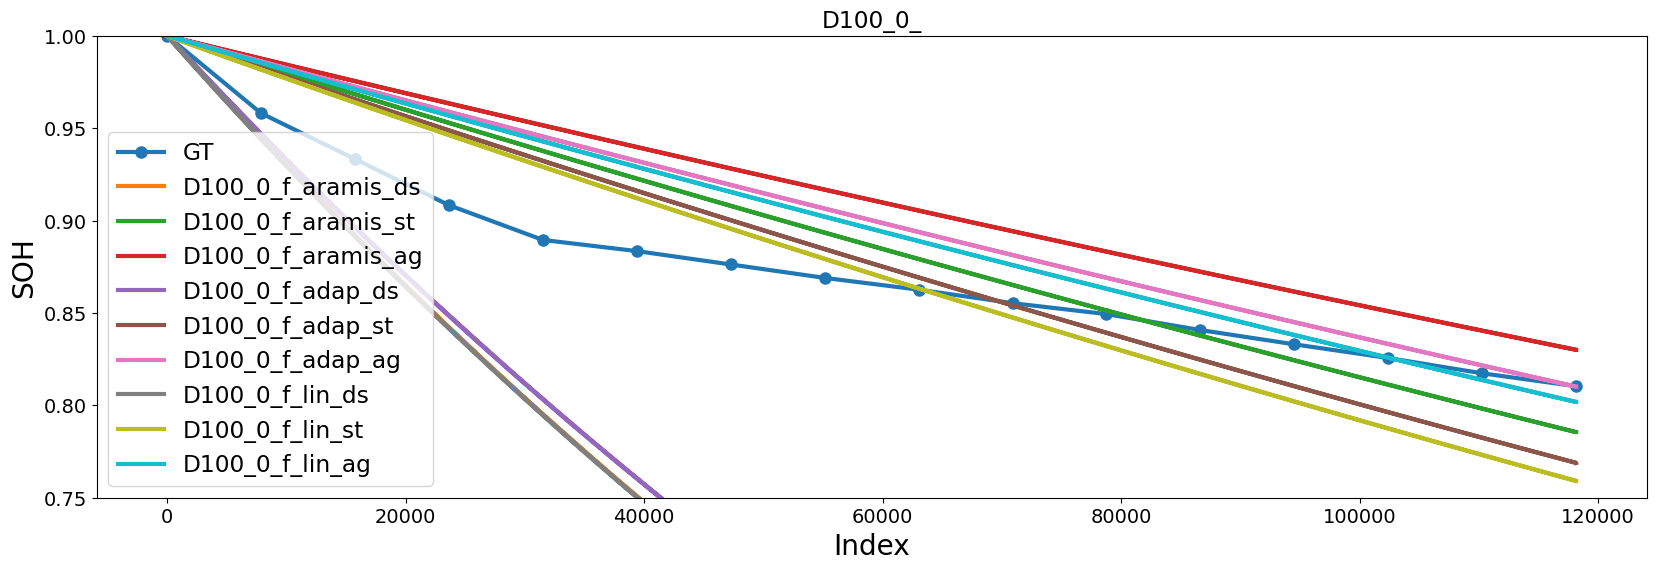

In [39]:
for i, cell in enumerate(cells):
    plt.figure(figsize=(20, 6))
    plt.plot(indexes_df[cell], gt_soh_values[cell], label="GT", marker = 'o')
    for j,model in enumerate(models_str):
        str_ = str(cell)+str(model)
        plt.plot(cells_SOH[str_].values, label=str_)
    plt.xlabel('Index')
    plt.ylabel('SOH')
    plt.title(cell)
    plt.ylim((0.75, 1))
    plt.legend()
    plt.show()

### Generamos el MAE de cada modelo

In [34]:
model_errors = pd.DataFrame()
errors = pd.DataFrame()
errors["Casos"] = cells

for i, cell in enumerate(cells):
    for j,model in enumerate(models_str):
        str_ = str(cell)+str(model)

        idx_gt = gt_soh_values[cell].last_valid_index()
        idx = cells_SOH[str_].last_valid_index()

        gt = gt_soh_values[cell][idx_gt]
        value = cells_SOH[str_][idx]

        error = np.round(abs(gt - value),2)
        model_errors[str_] = [error]

lst = []
for j,model in enumerate(models_str):
    for i,cell in enumerate(cells):
        str_ = str(cell)+str(model)
        lst.append(model_errors[str_][0])
    errors[model] = lst
    lst = []

errors

,Casos,f_aramis_ds,f_aramis_st,f_aramis_ag,f_adap_ds,f_adap_st,f_adap_ag,f_lin_ds,f_lin_st,f_lin_ag
0,D30_0,0.28,0.05,0.09,0.35,0.01,0.03,0.29,0.02,0.06
1,D85_70,0.40,0.10,0.06,0.65,0.21,0.09,0.41,0.11,0.07
2,D100_85,0.32,0.03,0.00,0.69,0.18,0.09,0.32,0.04,0.00
3,D100_0_drive,0.26,0.00,0.03,0.25,0.01,0.02,0.26,0.02,0.01
4,D100_0_,0.39,0.02,0.02,0.37,0.04,0.00,0.39,0.05,0.01


In [53]:
def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: red' if v else '' for v in is_min]

# Apply the highlight_min function across the rows (axis=1)
st_errors_style = errors.style.apply(highlight_min, axis=1, subset=pd.IndexSlice[:, 'f_aramis_ds':'f_lin_ag'])

# Display the styled DataFrame
st_errors_style

,Casos,f_aramis_ds,f_aramis_st,f_aramis_ag,f_adap_ds,f_adap_st,f_adap_ag,f_lin_ds,f_lin_st,f_lin_ag
0,D30_0,0.280000,0.050000,0.090000,0.350000,0.010000,0.030000,0.290000,0.020000,0.060000
1,D85_70,0.400000,0.100000,0.060000,0.650000,0.210000,0.090000,0.410000,0.110000,0.070000
2,D100_85,0.320000,0.030000,0.000000,0.690000,0.180000,0.090000,0.320000,0.040000,0.000000
3,D100_0_drive,0.260000,0.000000,0.030000,0.250000,0.010000,0.020000,0.260000,0.020000,0.010000
4,D100_0_,0.390000,0.020000,0.020000,0.370000,0.040000,0.000000,0.390000,0.050000,0.010000


In [58]:
st_errors = errors[["Casos","f_adap_ds","f_adap_st","f_adap_ag","f_lin_ds","f_lin_st","f_lin_ag"]]

def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: red' if v else '' for v in is_min]

# Apply the highlight_min function across the rows (axis=1)
st_errors_style = st_errors.style.apply(highlight_min, axis=1, subset=pd.IndexSlice[:, 'f_adap_ds':'f_lin_ag'])

# Display the styled DataFrame
st_errors_style

,Casos,f_adap_ds,f_adap_st,f_adap_ag,f_lin_ds,f_lin_st,f_lin_ag
0,D30_0,0.350000,0.010000,0.030000,0.290000,0.020000,0.060000
1,D85_70,0.650000,0.210000,0.090000,0.410000,0.110000,0.070000
2,D100_85,0.690000,0.180000,0.090000,0.320000,0.040000,0.000000
3,D100_0_drive,0.250000,0.010000,0.020000,0.260000,0.020000,0.010000
4,D100_0_,0.370000,0.040000,0.000000,0.390000,0.050000,0.010000


In [59]:
st_errors = errors[["Casos","f_aramis_st","f_adap_st","f_lin_st"]]
st_errors

def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: red' if v else '' for v in is_min]

# Apply the highlight_min function across the rows (axis=1)
st_errors_style = st_errors.style.apply(highlight_min, axis=1, subset=pd.IndexSlice[:, 'f_aramis_st':'f_lin_st'])

# Display the styled DataFrame
st_errors_style

,Casos,f_aramis_st,f_adap_st,f_lin_st
0,D30_0,0.050000,0.010000,0.020000
1,D85_70,0.100000,0.210000,0.110000
2,D100_85,0.030000,0.180000,0.040000
3,D100_0_drive,0.000000,0.010000,0.020000
4,D100_0_,0.020000,0.040000,0.050000


In [60]:
st_errors = errors[["Casos","f_adap_st","f_lin_st"]]
st_errors

def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: red' if v else '' for v in is_min]

# Apply the highlight_min function across the rows (axis=1)
st_errors_style = st_errors.style.apply(highlight_min, axis=1, subset=pd.IndexSlice[:, 'f_adap_st':'f_lin_st'])

# Display the styled DataFrame
st_errors_style

,Casos,f_adap_st,f_lin_st
0,D30_0,0.010000,0.020000
1,D85_70,0.210000,0.110000
2,D100_85,0.180000,0.040000
3,D100_0_drive,0.010000,0.020000
4,D100_0_,0.040000,0.050000
